# **Traffic Congestion and Electric Vehicle (EV) Charging Infrastructure Analysis in Summit County, Ohio: A Hierarchical Time Series Approach**

## **1. Introduction**  
The adoption of **electric vehicles (EVs)** is rapidly increasing, bringing new challenges for transportation infrastructure, particularly in **charging station planning and accessibility**. One critical factor influencing EV infrastructure efficiency is **traffic congestion**, which varies across different road networks, affecting both the placement and utilization of charging stations.  

This study aims to analyze the **relationship between traffic congestion patterns and EV charging station distribution** in **Summit County, Ohio**, using **hierarchical time series modeling and geospatial analysis**. By integrating **traffic congestion data** with **EV charging infrastructure information**, this research will identify **high-traffic areas needing additional charging stations** and forecast **long-term congestion trends** to support data-driven urban mobility planning.

---

## **2. Objectives & Research Questions**  
The primary objectives of this research are:  

### **1. Hierarchical Forecasting of Traffic Congestion Trends**
- How does congestion evolve **at different levels** (county-wide, road types, and individual road segments)?  
- Can **hierarchical time series forecasting** improve **the accuracy of long-term congestion predictions**?  

### **2. Understanding EV Charging Accessibility in Congested Areas**
- Are **high-congestion road segments more likely to have EV charging stations**?  
- How does **traffic density influence EV infrastructure utilization and accessibility**?  

### **3. Identifying Infrastructure Gaps for Future Charging Station Placement**
- Which **high-traffic areas lack sufficient charging infrastructure**?  
- How can congestion patterns be used to **recommend optimal charging station locations**?  

---

## **3. Data Sources & Structure**  
This analysis integrates **two primary datasets**, obtained from authoritative transportation and geographic information systems:

### **1. EV Charging Stations Dataset**
- **Source:** [Summit County GIS Open Data Portal](https://data-summitgis.opendata.arcgis.com/search?tags=ev)  
- **Description:** Contains **52 EV charging station locations**, with details such as:
  - **Geospatial coordinates** (latitude, longitude)
  - **Station type** (public/private, Level 1/2/3 chargers)
  - **Charging network provider**
  - **Availability status**  

### **2. Traffic Congestion Dataset**
- **Source:** [Ohio Department of Transportation (ODOT) TIMS](https://tims.dot.state.oh.us/tims/data-glossary/dataset/1090e648388d4443802d9bf661ad950c)  
- **Description:** Contains **146,565 records** of traffic volume and road usage data, including:
  - **Annual Average Daily Traffic (AADT)**
  - **Vehicle Miles Traveled (VMT)**
  - **Traffic counts by vehicle type (cars, trucks, buses)**
  - **Road segment classifications (highways, arterials, local roads)**  

---

## **4. Methodology: A Hierarchical Time Series Approach**  
Given the nature of the dataset, a **hierarchical approach** will be employed to model **congestion trends at multiple levels**. This structure allows for both **macro-level (county-wide) and micro-level (individual road segments) insights**.

### **1. County-Wide Traffic Analysis**
- Aggregates congestion metrics (AADT, VMT) for **Summit County as a whole**.
- Provides a **top-level view** of how congestion changes over time.

### **2. Road Type-Based Congestion Analysis**
- Categorizes congestion by **highways, arterials, and local roads**.
- Evaluates whether **certain road types experience disproportionately high congestion**.

### **3. Road Segment-Level Congestion Near EV Charging Stations**
- Matches **traffic data with the closest EV charging stations**.
- Identifies whether **stations in high-congestion areas experience greater accessibility issues**.
- Determines if **high-traffic locations lack adequate charging infrastructure**.

---

## **5. Analytical Framework**
To achieve the research objectives, this study will follow a structured **data processing, modeling, and visualization pipeline**.

### **1. Data Preprocessing & Feature Engineering**
- **Merge** congestion data with EV charging locations using **geospatial joins**.
- **Aggregate** congestion data at different hierarchical levels.
- **Generate congestion indices** to quantify traffic intensity across different locations.

### **2. Geospatial & Statistical Analysis**
- **Map congestion hotspots** overlaid with charging station locations.
- **Perform correlation analysis** to assess the relationship between **congestion density and charging station availability**.

### **3. Hierarchical Time Series Forecasting**
- **Develop multi-level congestion models** to predict future trends at different scales.
- **Apply ARIMA, Prophet, or XGBoost models** to forecast **long-term congestion**.
- **Use hierarchical forecasting techniques** to ensure consistent predictions across all levels.

### **4. EV Infrastructure Gap Identification**
- Identify **high-traffic areas with insufficient charging infrastructure**.
- Use clustering techniques (**K-Means, DBSCAN**) to detect **charging station demand gaps**.

---

## **6. Expected Outcomes**
**Hierarchical congestion forecasts** at the **county, road-type, and road-segment levels**.  
**Geospatial insights into congestion-affected EV charging stations**.  
**Recommendations for optimizing charging station placements** based on congestion trends.  
**Actionable data-driven strategies for policymakers and urban planners**.  

---

## **8. Conclusion**
This research presents a **novel approach to integrating hierarchical time series modeling with geospatial analysis** to understand the impact of **traffic congestion on EV charging infrastructure**. By forecasting congestion trends at different levels and **identifying gaps in charging station accessibility**, this study will provide **data-driven recommendations for optimizing EV infrastructure planning** in Summit County, Ohio.  


## Loading the Required Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
import plotly.express as px
from scipy.spatial import cKDTree

## Loading the Two Datasets 

In [102]:
# Define file paths
ev_data_path = "C:\\Users\\attafuro\\Desktop\\Congestion Analysis and EV Charging\\EV_Charging_Stations.csv"
traffic_data_path = "C:\\Users\\attafuro\\Desktop\\Congestion Analysis and EV Charging\\WGIS_TRAFFIC_COUNT_SEGMENTS.csv"

# Load the datasets
ev_data = pd.read_csv(ev_data_path)
traffic_data = pd.read_csv(traffic_data_path)

# Display the first few rows of each dataset to confirm successful loading
print("\n First 5 Rows of EV Charging Stations Dataset:")
display(ev_data.head())

print("\n First 5 Rows of Traffic Congestion Dataset:")
display(traffic_data.head())

# Print dataset dimensions
print(f"\n EV Charging Dataset Loaded: {ev_data.shape[0]} rows, {ev_data.shape[1]} columns")
print(f" Traffic Congestion Dataset Loaded: {traffic_data.shape[0]} rows, {traffic_data.shape[1]} columns")



 First 5 Rows of EV Charging Stations Dataset:


,IN_SingleLine,USER_Community,USER_Charger_Type,USER_Location,USER_Notes,USER_F6,USER_F7,USER_F8,USER_F9,USER_F10,...,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,USER_Address
0,"1535 Vernon Odom Blvd, Akron OH 44320",NaN,J-1772,Summit Toyota of Akron,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.576670,41.063024,-81.576895,41.063494,-81.577895,-81.575895,41.062494,41.064494,NaN,"1535 Vernon Odom Blvd, Akron OH 44320"
1,"322 W Market St, Akron OH 44303",NaN,J-1772,Vandevere Kia,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.527936,41.089965,-81.528104,41.089721,-81.529104,-81.527104,41.088721,41.090721,NaN,"322 W Market St, Akron OH 44303"
2,"834 W Market St, Akron OH 44303",NaN,J-1772,Walgreens,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.544309,41.096876,-81.544618,41.096476,-81.545618,-81.543618,41.095476,41.097476,NaN,"834 W Market St, Akron OH 44303"
3,1745 W Market St Akron OH 44313,NaN,J-1772,Whole Foods Market,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.571469,41.110625,-81.571241,41.110942,-81.572241,-81.570241,41.109942,41.111942,NaN,1745 W Market St Akron OH 44313
4,"374 Bell St, Akron OH 44307",NaN,J-1772,BMV,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.535703,41.084010,-81.535703,41.084010,-81.536703,-81.534703,41.083010,41.085010,NaN,"374 Bell St, Akron OH 44307"



 First 5 Rows of Traffic Congestion Dataset:


,OBJECTID,ID,STATION_ID_NBR,NLFID,COUNTY_CD,ROUTE_TYPE,ROUTE_NBR,CTL_BEGIN_NBR,CTL_END_NBR,SEGMENT_LENGTH,...,AADT_COMBINATION_TRUCKS,VMT_TOTAL,VMT_CARS,VMT_TRUCKS,TRAFFIC_REPORTS,created_user,created_date,last_edited_user,last_edited_date,SHAPE.STLength()
0,132773,78538550,60531.0,SHAMRA31048**C,HAM,RA,31048,0.216,0.306,0.090,...,226.0,469.89,443.43,26.46,http://odot.ms2soft.com/tcds/set_session.asp?l...,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,186.452373
1,132774,78537789,NaN,CGRECR00055**C,GRE,CR,00055,0.466,0.513,0.047,...,13.0,190.54,188.52,2.02,NaN,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,98.665189
2,132775,78539610,17822.0,SERIRA22038**C,ERI,RA,22038,0.000,0.388,0.388,...,31.0,1718.84,1668.79,50.05,http://odot.ms2soft.com/tcds/set_session.asp?l...,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,832.555060
3,132776,78537168,NaN,CBUTCR00019**C,BUT,CR,00019,6.729,7.252,0.523,...,534.0,9961.06,9371.64,589.42,NaN,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,1090.912864
4,132777,78532946,5964898.0,CLUCCR00071**C,LUC,CR,00071,1.535,1.908,0.373,...,34.0,1740.42,1559.89,180.53,http://odot.ms2soft.com/tcds/set_session.asp?l...,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,TIMS@P31_TIMS_CLASSIC,2024-06-20 14:39:28,805.192441



 EV Charging Dataset Loaded: 51 rows, 72 columns
 Traffic Congestion Dataset Loaded: 146564 rows, 25 columns


## Data Cleaning ( EV Charging Data)

In [103]:
# Basic info of the dataset
print(" EV Charging Stations Dataset Overview:\n")
ev_data.info()


 EV Charging Stations Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IN_SingleLine      51 non-null     object 
 1   USER_Community     0 non-null      float64
 2   USER_Charger_Type  51 non-null     object 
 3   USER_Location      51 non-null     object 
 4   USER_Notes         6 non-null      object 
 5   USER_F6            0 non-null      float64
 6   USER_F7            0 non-null      float64
 7   USER_F8            0 non-null      float64
 8   USER_F9            0 non-null      float64
 9   USER_F10           0 non-null      float64
 10  USER_F11           0 non-null      float64
 11  ObjectID           51 non-null     int64  
 12  Loc_name           51 non-null     object 
 13  Status             51 non-null     object 
 14  Score              51 non-null     float64
 15  Match_type         51 non-null     

In [104]:
# Check for missing values
print("\n Missing Values in EV Charging Data:\n")
missing_ev = ev_data.isnull().sum()
missing_ev = missing_ev[missing_ev > 0].sort_values(ascending=False)
print(missing_ev)




 Missing Values in EV Charging Data:

USER_Community    51
Zone              51
UnitName          51
UnitType          51
LevelName         51
LevelType         51
BldgName          51
BldgType          51
StPreType         51
Sector            51
District          51
MetroArea         51
Block             51
Territory         51
AddBldg           51
URL               51
Phone             51
PlaceName         51
Type              51
USER_F11          51
USER_F10          51
USER_F9           51
USER_F8           51
USER_F7           51
USER_F6           51
SubAddr           51
StDir             50
Nbrhd             48
ExInfo            48
USER_Notes        45
Side              45
AddRange          45
AddNumTo          45
AddNumFrom        45
StPreDir          36
PostalExt          3
AddNum             1
dtype: int64


In [105]:
# Display unique values in key columns to check consistency
print("\n Unique Charger Types:\n")
print(ev_data["USER_Charger_Type"].unique())




 Unique Charger Types:

['J-1772' 'Tesla' 'J-1772/Tesla' 'CHAdeMO' 'Supercharger' 'Wall/J-1772'
 'NEMA TT-30 Wall']


In [106]:
print("\n Unique Station Locations:\n")
print(ev_data["USER_Location"].unique())




 Unique Station Locations:

['Summit Toyota of Akron' 'Vandevere Kia' 'Walgreens' 'Whole Foods Market'
 'BMV' 'Akron Centre Parking Deck' 'Cascade Parking Garage'
 "Akron Children's Hospital-Buchtel" "Akron Children's Hospital"
 "Akron Children's Hospital-Exchange"
 'Courtyard by Marriott Akron Downtown' 'Broadway Deck' '797 Apartments'
 "Papa Joe's" 'Mercedes Benz of Akron' 'USIlluminations HQ'
 'Comfort Inn & Suites' 'Arhaus' 'Opportunity Parking Deck'
 '2nd Steet Parking' 'Shearton Suites Akron' 'Front Street Parking Lot'
 'Western Reserve Hospital' 'Cascade Audi' 'ContiTech USA'
 'Huntington Bank' 'Ron Marhofer Hyundai' 'Serra Acura' 'Al Spitzer Ford'
 'Fred Martin Nissan' 'Lexus of Akron' 'Cambria Hotel Akron'
 'The Shoppes of Green' 'VC Station' 'Green City Zoning Office'
 'Downtown Hudson' 'Akron Canton Airport' 'JoAnn Fabrics' 'NC Soccer Club'
 'Tesla Only' 'Appalachian Outfitters' 'Sohars All Season Mower'
 'Campground' 'Hampton Inn' 'Stow Akron General' 'Thompson Electric'
 

In [107]:
# Preview the dataset
print("\n Sample Data (First 5 Rows):")
display(ev_data.head())


 Sample Data (First 5 Rows):


,IN_SingleLine,USER_Community,USER_Charger_Type,USER_Location,USER_Notes,USER_F6,USER_F7,USER_F8,USER_F9,USER_F10,...,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,USER_Address
0,"1535 Vernon Odom Blvd, Akron OH 44320",NaN,J-1772,Summit Toyota of Akron,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.576670,41.063024,-81.576895,41.063494,-81.577895,-81.575895,41.062494,41.064494,NaN,"1535 Vernon Odom Blvd, Akron OH 44320"
1,"322 W Market St, Akron OH 44303",NaN,J-1772,Vandevere Kia,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.527936,41.089965,-81.528104,41.089721,-81.529104,-81.527104,41.088721,41.090721,NaN,"322 W Market St, Akron OH 44303"
2,"834 W Market St, Akron OH 44303",NaN,J-1772,Walgreens,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.544309,41.096876,-81.544618,41.096476,-81.545618,-81.543618,41.095476,41.097476,NaN,"834 W Market St, Akron OH 44303"
3,1745 W Market St Akron OH 44313,NaN,J-1772,Whole Foods Market,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.571469,41.110625,-81.571241,41.110942,-81.572241,-81.570241,41.109942,41.111942,NaN,1745 W Market St Akron OH 44313
4,"374 Bell St, Akron OH 44307",NaN,J-1772,BMV,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.535703,41.084010,-81.535703,41.084010,-81.536703,-81.534703,41.083010,41.085010,NaN,"374 Bell St, Akron OH 44307"


In [108]:
# Define columns to drop (100% missing or irrelevant)
columns_to_drop = [
    "USER_Community", "USER_F6", "USER_F7", "USER_F8", "USER_F9", "USER_F10", "USER_F11",
    "Type", "PlaceName", "Phone", "URL", "AddBldg", "StPreType", "BldgType", "BldgName",
    "LevelType", "LevelName", "UnitType", "UnitName", "SubAddr", "Block", "Sector", 
    "District", "MetroArea", "Territory", "Zone"
]

# Drop the columns
ev_data_cleaned = ev_data.drop(columns=columns_to_drop)

# Print the new dataset shape
print(f" Cleaned EV Charging Dataset: {ev_data_cleaned.shape[0]} rows, {ev_data_cleaned.shape[1]} columns")

# Display first few rows of the cleaned dataset
ev_data_cleaned.head()


 Cleaned EV Charging Dataset: 51 rows, 46 columns


,IN_SingleLine,USER_Charger_Type,USER_Location,USER_Notes,ObjectID,Loc_name,Status,Score,Match_type,Match_addr,...,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,USER_Address
0,"1535 Vernon Odom Blvd, Akron OH 44320",J-1772,Summit Toyota of Akron,NaN,1,World,M,100.0,A,"1535 Vernon Odom Blvd, Akron, Ohio, 44320",...,-81.576670,41.063024,-81.576895,41.063494,-81.577895,-81.575895,41.062494,41.064494,NaN,"1535 Vernon Odom Blvd, Akron OH 44320"
1,"322 W Market St, Akron OH 44303",J-1772,Vandevere Kia,NaN,2,World,M,100.0,A,"322 W Market St, Akron, Ohio, 44303",...,-81.527936,41.089965,-81.528104,41.089721,-81.529104,-81.527104,41.088721,41.090721,NaN,"322 W Market St, Akron OH 44303"
2,"834 W Market St, Akron OH 44303",J-1772,Walgreens,NaN,3,World,M,100.0,A,"834 W Market St, Akron, Ohio, 44303",...,-81.544309,41.096876,-81.544618,41.096476,-81.545618,-81.543618,41.095476,41.097476,NaN,"834 W Market St, Akron OH 44303"
3,1745 W Market St Akron OH 44313,J-1772,Whole Foods Market,NaN,4,World,M,100.0,A,"1745 W Market St, Akron, Ohio, 44313",...,-81.571469,41.110625,-81.571241,41.110942,-81.572241,-81.570241,41.109942,41.111942,NaN,1745 W Market St Akron OH 44313
4,"374 Bell St, Akron OH 44307",J-1772,BMV,NaN,5,World,M,100.0,A,"374 Bell St, Akron, Ohio, 44307",...,-81.535703,41.084010,-81.535703,41.084010,-81.536703,-81.534703,41.083010,41.085010,NaN,"374 Bell St, Akron OH 44307"


In [109]:
# Fill missing USER_Notes and ExInfo with "No additional info" (Fix for Pandas 3.0)
ev_data_cleaned = ev_data_cleaned.copy()  # Ensure we're working on a copy
ev_data_cleaned.loc[:, 'USER_Notes'] = ev_data_cleaned['USER_Notes'].fillna("No additional info")
ev_data_cleaned.loc[:, 'ExInfo'] = ev_data_cleaned['ExInfo'].fillna("No additional info")

# Confirm missing values are handled
print("\n Missing values handled.")
print(ev_data_cleaned.isnull().sum().sum(), "total missing values remain.")



 Missing values handled.
318 total missing values remain.


In [110]:
# Show columns with missing values
missing_values = ev_data_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing values count
print("\n Columns with Remaining Missing Values:")
display(missing_values)



 Columns with Remaining Missing Values:


StDir         50
Nbrhd         48
AddNumFrom    45
AddNumTo      45
AddRange      45
Side          45
StPreDir      36
PostalExt      3
AddNum         1
dtype: int64

In [111]:
# List of columns to drop
columns_to_drop = ["StDir", "Nbrhd", "AddNumFrom", "AddNumTo", "AddRange", "Side"]

# Drop the columns
ev_data_cleaned = ev_data_cleaned.drop(columns=columns_to_drop)

print(f" Dropped {len(columns_to_drop)} columns with excessive missing values.")


 Dropped 6 columns with excessive missing values.


In [112]:
# Fill missing values for StPreDir with "Unknown"
ev_data_cleaned.loc[:, "StPreDir"] = ev_data_cleaned["StPreDir"].fillna("Unknown")

# Fill missing PostalExt with "0000"
ev_data_cleaned.loc[:, "PostalExt"] = ev_data_cleaned["PostalExt"].fillna("0000")

# Fill missing AddNum with the median house number
ev_data_cleaned.loc[:, "AddNum"] = ev_data_cleaned["AddNum"].fillna(ev_data_cleaned["AddNum"].median())

print(" Missing values filled where necessary.")


 Missing values filled where necessary.


In [113]:
ev_data_cleaned.head()

,IN_SingleLine,USER_Charger_Type,USER_Location,USER_Notes,ObjectID,Loc_name,Status,Score,Match_type,Match_addr,...,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,USER_Address
0,"1535 Vernon Odom Blvd, Akron OH 44320",J-1772,Summit Toyota of Akron,No additional info,1,World,M,100.0,A,"1535 Vernon Odom Blvd, Akron, Ohio, 44320",...,-81.576670,41.063024,-81.576895,41.063494,-81.577895,-81.575895,41.062494,41.064494,No additional info,"1535 Vernon Odom Blvd, Akron OH 44320"
1,"322 W Market St, Akron OH 44303",J-1772,Vandevere Kia,No additional info,2,World,M,100.0,A,"322 W Market St, Akron, Ohio, 44303",...,-81.527936,41.089965,-81.528104,41.089721,-81.529104,-81.527104,41.088721,41.090721,No additional info,"322 W Market St, Akron OH 44303"
2,"834 W Market St, Akron OH 44303",J-1772,Walgreens,No additional info,3,World,M,100.0,A,"834 W Market St, Akron, Ohio, 44303",...,-81.544309,41.096876,-81.544618,41.096476,-81.545618,-81.543618,41.095476,41.097476,No additional info,"834 W Market St, Akron OH 44303"
3,1745 W Market St Akron OH 44313,J-1772,Whole Foods Market,No additional info,4,World,M,100.0,A,"1745 W Market St, Akron, Ohio, 44313",...,-81.571469,41.110625,-81.571241,41.110942,-81.572241,-81.570241,41.109942,41.111942,No additional info,1745 W Market St Akron OH 44313
4,"374 Bell St, Akron OH 44307",J-1772,BMV,No additional info,5,World,M,100.0,A,"374 Bell St, Akron, Ohio, 44307",...,-81.535703,41.084010,-81.535703,41.084010,-81.536703,-81.534703,41.083010,41.085010,No additional info,"374 Bell St, Akron OH 44307"


In [114]:
# Standardize charger type values (uppercase, no extra spaces)
ev_data_cleaned.loc[:, "USER_Charger_Type"] = ev_data_cleaned["USER_Charger_Type"].str.upper().str.strip()

# Check unique charger types after cleaning
print("\n Unique Charger Types After Cleaning:")
print(ev_data_cleaned["USER_Charger_Type"].unique())



 Unique Charger Types After Cleaning:
['J-1772' 'TESLA' 'J-1772/TESLA' 'CHADEMO' 'SUPERCHARGER' 'WALL/J-1772'
 'NEMA TT-30 WALL']


In [115]:
# Clean USER_Location column: Remove extra spaces, standardize capitalization
ev_data_cleaned.loc[:, "USER_Location"] = ev_data_cleaned["USER_Location"].str.strip().str.title()

# Check unique station names after cleaning
print("\n Unique Charging Station Locations After Cleaning:")
print(ev_data_cleaned["USER_Location"].unique())



 Unique Charging Station Locations After Cleaning:
['Summit Toyota Of Akron' 'Vandevere Kia' 'Walgreens' 'Whole Foods Market'
 'Bmv' 'Akron Centre Parking Deck' 'Cascade Parking Garage'
 "Akron Children'S Hospital-Buchtel" "Akron Children'S Hospital"
 "Akron Children'S Hospital-Exchange"
 'Courtyard By Marriott Akron Downtown' 'Broadway Deck' '797 Apartments'
 "Papa Joe'S" 'Mercedes Benz Of Akron' 'Usilluminations Hq'
 'Comfort Inn & Suites' 'Arhaus' 'Opportunity Parking Deck'
 '2Nd Steet Parking' 'Shearton Suites Akron' 'Front Street Parking Lot'
 'Western Reserve Hospital' 'Cascade Audi' 'Contitech Usa'
 'Huntington Bank' 'Ron Marhofer Hyundai' 'Serra Acura' 'Al Spitzer Ford'
 'Fred Martin Nissan' 'Lexus Of Akron' 'Cambria Hotel Akron'
 'The Shoppes Of Green' 'Vc Station' 'Green City Zoning Office'
 'Downtown Hudson' 'Akron Canton Airport' 'Joann Fabrics' 'Nc Soccer Club'
 'Tesla Only' 'Appalachian Outfitters' 'Sohars All Season Mower'
 'Campground' 'Hampton Inn' 'Stow Akron General

In [116]:
# Check if X, Y are different from DisplayX, DisplayY
coordinate_difference = (ev_data_cleaned["X"] != ev_data_cleaned["DisplayX"]).sum() + \
                        (ev_data_cleaned["Y"] != ev_data_cleaned["DisplayY"]).sum()

if coordinate_difference == 0:
    print("\n Coordinates are consistent (X, Y match DisplayX, DisplayY).")
else:
    print("\n Coordinates differ! Keeping X, Y as the primary location reference.")



 Coordinates differ! Keeping X, Y as the primary location reference.


In [117]:
# Drop DisplayX and DisplayY since X, Y is the primary reference
ev_data_cleaned = ev_data_cleaned.drop(columns=["DisplayX", "DisplayY"])

print("\n Dropped DisplayX and DisplayY. Using X, Y as primary coordinates.")



 Dropped DisplayX and DisplayY. Using X, Y as primary coordinates.


In [118]:
# Drop unnecessary columns
columns_to_drop = ["USER_Notes", "LangCode", "ExInfo"]
ev_data_cleaned = ev_data_cleaned.drop(columns=columns_to_drop)

print(f"\n Dropped {len(columns_to_drop)} columns: {columns_to_drop}")



 Dropped 3 columns: ['USER_Notes', 'LangCode', 'ExInfo']


In [119]:
# Extract relevant info from Match_addr (Assumes format: "Street, City, State, ZIP")
ev_data_cleaned["Street"] = ev_data_cleaned["Match_addr"].apply(lambda x: x.split(",")[0] if pd.notnull(x) else "Unknown")
ev_data_cleaned["Zip_Code"] = ev_data_cleaned["Match_addr"].apply(lambda x: x.split(",")[-1].strip() if pd.notnull(x) else "Unknown")

# Extract relevant info from USER_Address
ev_data_cleaned["Street_User"] = ev_data_cleaned["USER_Address"].apply(lambda x: x.split(",")[0] if pd.notnull(x) else "Unknown")


In [120]:
# Drop full address columns
ev_data_cleaned = ev_data_cleaned.drop(columns=["Match_addr", "USER_Address"])

print("\n Dropped full address columns. Kept only relevant extracted fields.")



 Dropped full address columns. Kept only relevant extracted fields.


In [121]:
# Define a dictionary for renaming columns
column_renaming = {
    "IN_SingleLine": "Full_Address",
    "USER_Charger_Type": "Charger_Type",
    "USER_Location": "Station_Name",
    "ObjectID": "Station_ID",
    "Loc_name": "Location_Type",
    "Status": "Station_Status",
    "Score": "Match_Score",
    "Match_type": "Match_Type",
    "LongLabel": "Formatted_Address",
    "ShortLabel": "Short_Address",
    "Addr_type": "Address_Type",
    "Place_addr": "Business_Address",
    "Rank": "Match_Rank",
    "AddNum": "Street_Number",
    "StPreDir": "Street_Prefix",
    "StName": "Street_Name",
    "StType": "Street_Type",
    "StAddr": "Street_Address",
    "City": "City",
    "Subregion": "County",
    "Region": "State",
    "RegionAbbr": "State_Abbr",
    "Postal": "Postal_Code",
    "PostalExt": "Postal_Extension",
    "Country": "Country",
    "CntryName": "Country_Name",
    "Distance": "Distance_From_Center",
    "X": "Longitude",
    "Y": "Latitude",
    "Xmin": "Bounding_Box_Xmin",
    "Xmax": "Bounding_Box_Xmax",
    "Ymin": "Bounding_Box_Ymin",
    "Ymax": "Bounding_Box_Ymax",
    "Street": "Extracted_Street",
    "Zip_Code": "Extracted_Zip_Code",
    "Street_User": "User_Provided_Street"
}

# Rename the dataset columns
ev_data_cleaned = ev_data_cleaned.rename(columns=column_renaming)

# Print new column names
print("\n Renamed columns for better clarity:")
ev_data_cleaned.head()



 Renamed columns for better clarity:


,Full_Address,Charger_Type,Station_Name,Station_ID,Location_Type,Station_Status,Match_Score,Match_Type,Formatted_Address,Short_Address,...,Distance_From_Center,Longitude,Latitude,Bounding_Box_Xmin,Bounding_Box_Xmax,Bounding_Box_Ymin,Bounding_Box_Ymax,Extracted_Street,Extracted_Zip_Code,User_Provided_Street
0,"1535 Vernon Odom Blvd, Akron OH 44320",J-1772,Summit Toyota Of Akron,1,World,M,100.0,A,"1535 Vernon Odom Blvd, Akron, OH, 44320, USA",1535 Vernon Odom Blvd,...,0,-81.576670,41.063024,-81.577895,-81.575895,41.062494,41.064494,1535 Vernon Odom Blvd,44320,1535 Vernon Odom Blvd
1,"322 W Market St, Akron OH 44303",J-1772,Vandevere Kia,2,World,M,100.0,A,"322 W Market St, Akron, OH, 44303, USA",322 W Market St,...,0,-81.527936,41.089965,-81.529104,-81.527104,41.088721,41.090721,322 W Market St,44303,322 W Market St
2,"834 W Market St, Akron OH 44303",J-1772,Walgreens,3,World,M,100.0,A,"834 W Market St, Akron, OH, 44303, USA",834 W Market St,...,0,-81.544309,41.096876,-81.545618,-81.543618,41.095476,41.097476,834 W Market St,44303,834 W Market St
3,1745 W Market St Akron OH 44313,J-1772,Whole Foods Market,4,World,M,100.0,A,"1745 W Market St, Akron, OH, 44313, USA",1745 W Market St,...,0,-81.571469,41.110625,-81.572241,-81.570241,41.109942,41.111942,1745 W Market St,44313,1745 W Market St Akron OH 44313
4,"374 Bell St, Akron OH 44307",J-1772,Bmv,5,World,M,100.0,A,"374 Bell St, Akron, OH, 44307, USA",374 Bell St,...,0,-81.535703,41.084010,-81.536703,-81.534703,41.083010,41.085010,374 Bell St,44307,374 Bell St


# EV Charging Stations Dataset - Column Descriptions

Below is the explanation of each column in the dataset after renaming for better clarity.

| **Column Name**        | **Description** |
|------------------------|----------------|
| `Full_Address`        | Full formatted address of the charging station. |
| `Charger_Type`        | Type of EV charger (e.g., J-1772, Tesla). |
| `Station_Name`        | Name of the charging station (business/place). |
| `Station_ID`          | Unique ID for the charging station. |
| `Location_Type`       | Description of the location type (World, Local, etc.). |
| `Station_Status`      | Status of the station (e.g., Active, Inactive). |
| `Match_Score`        | Accuracy score of address matching. |
| `Match_Type`         | Type of address match (A = Accurate, etc.). |
| `Formatted_Address`  | Standardized address label. |
| `Short_Address`      | Simplified short address. |
| `Address_Type`       | Type of address format. |
| `Business_Address`   | Address of the business where the station is located. |
| `Match_Rank`        | Ranking of the address match. |
| `Street_Number`      | House/building number of the station location. |
| `Street_Prefix`      | Directional prefix for streets (e.g., N, S, E, W). |
| `Street_Name`        | Name of the street where the station is located. |
| `Street_Type`        | Type of street (e.g., Ave, Blvd, St). |
| `Street_Address`     | Full street address. |
| `City`              | City where the charging station is located. |
| `County`            | County where the station is located. |
| `State`             | State where the station is located. |
| `State_Abbr`        | Abbreviation of the state. |
| `Postal_Code`       | ZIP Code of the station. |
| `Postal_Extension`  | Extra ZIP Code extension (if available). |
| `Country`           | Country where the station is located. |
| `Country_Name`      | Full country name. |
| `Distance_From_Center` | Distance from the central reference point. |
| `Longitude`         | Geographic longitude of the station. |
| `Latitude`          | Geographic latitude of the station. |
| `Bounding_Box_Xmin` | Bounding box minimum longitude for location mapping. |
| `Bounding_Box_Xmax` | Bounding box maximum longitude for location mapping. |
| `Bounding_Box_Ymin` | Bounding box minimum latitude for location mapping. |
| `Bounding_Box_Ymax` | Bounding box maximum latitude for location mapping. |
| `Extracted_Street`  | Extracted street name from address. |
| `Extracted_Zip_Code` | Extracted ZIP Code from address. |
| `User_Provided_Street` | User-input street name. |


## Exploratory Data Analysis (EDA) – Focus on Summit County

This EDA is conducted **specifically for Summit County**, ensuring that all insights and trends are directly relevant to the region of interest. By filtering the dataset to include only Summit County locations, we can:

- **Ensure Data Relevance**: The study aims to analyze **EV charging infrastructure and congestion trends** in Summit County, making it essential to exclude unrelated locations.
- **Enhance Analytical Accuracy**: Considering data outside Summit County could introduce **misleading patterns** that do not reflect the local infrastructure.
- **Optimize Resource Planning**: Understanding **charger distribution, usage patterns, and accessibility** within Summit County supports better **transportation planning and policy recommendations**.

By narrowing our focus, we ensure that **all insights drive meaningful conclusions for EV infrastructure in Summit County**.


In [122]:
# Keep only rows where County is "Summit"
ev_summit = ev_data_cleaned[ev_data_cleaned["County"].str.contains("Summit", case=False, na=False)]

# Print new dataset shape
print(f"\n Filtered Dataset: {ev_summit.shape[0]} rows, {ev_summit.shape[1]} columns")



 Filtered Dataset: 51 rows, 36 columns


In [123]:
# Define columns to drop
columns_to_drop = ["Street_Number", "Station_ID", "Match_Score", "Match_Type", "Formatted_Address", "Full_Address","Match_Rank","Distance_From_Center"]

# Drop columns from dataset
ev_summit = ev_summit.drop(columns=columns_to_drop)

# Print dataset shape after dropping
print(f" Updated Dataset: {ev_summit.shape[0]} rows, {ev_summit.shape[1]} columns")


 Updated Dataset: 51 rows, 28 columns


In [124]:
ev_summit.dtypes

Charger_Type             object
Station_Name             object
Location_Type            object
Station_Status           object
Short_Address            object
Address_Type             object
Business_Address         object
Street_Prefix            object
Street_Name              object
Street_Type              object
Street_Address           object
City                     object
County                   object
State                    object
State_Abbr               object
Postal_Code               int64
Postal_Extension         object
Country                  object
Country_Name             object
Longitude               float64
Latitude                float64
Bounding_Box_Xmin       float64
Bounding_Box_Xmax       float64
Bounding_Box_Ymin       float64
Bounding_Box_Ymax       float64
Extracted_Street         object
Extracted_Zip_Code       object
User_Provided_Street     object
dtype: object

In [125]:
# Convert Postal_Code to string (ZIP codes should not be treated as numbers)
ev_summit["Postal_Code"] = ev_summit["Postal_Code"].astype(str)

# Ensure Postal_Extension is a string
ev_summit["Postal_Extension"] = ev_summit["Postal_Extension"].astype(str)

ev_summit.dtypes


Charger_Type             object
Station_Name             object
Location_Type            object
Station_Status           object
Short_Address            object
Address_Type             object
Business_Address         object
Street_Prefix            object
Street_Name              object
Street_Type              object
Street_Address           object
City                     object
County                   object
State                    object
State_Abbr               object
Postal_Code              object
Postal_Extension         object
Country                  object
Country_Name             object
Longitude               float64
Latitude                float64
Bounding_Box_Xmin       float64
Bounding_Box_Xmax       float64
Bounding_Box_Ymin       float64
Bounding_Box_Ymax       float64
Extracted_Street         object
Extracted_Zip_Code       object
User_Provided_Street     object
dtype: object

In [126]:
print(" Summary of Numeric Features:")
ev_summit.describe()

 Summary of Numeric Features:


,Longitude,Latitude,Bounding_Box_Xmin,Bounding_Box_Xmax,Bounding_Box_Ymin,Bounding_Box_Ymax
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-81.503230,41.122176,-81.504357,-81.502357,41.121213,41.123213
std,0.051954,0.097540,0.051958,0.051958,0.097447,0.097447
min,-81.653886,40.917757,-81.655365,-81.653365,40.916818,40.918818
25%,-81.524439,41.078702,-81.525173,-81.523173,41.077770,41.079770
50%,-81.493252,41.120776,-81.495508,-81.493508,41.119837,41.121837
75%,-81.476791,41.183040,-81.478241,-81.476241,41.182253,41.184253
max,-81.402257,41.338068,-81.403257,-81.401257,41.336573,41.338573


### ** Geos Analysis of EV Charging Stations in Summit County**  

This section provides a statistical summary of the geographic distribution of **EV charging stations** within **Summit County, Ohio**. The dataset includes **longitude, latitude, and bounding box coordinates**, which collectively define the spatial extent of each station.  

---

## **Geographic Distribution of Charging Stations**  
The dataset comprises **51 EV charging stations**, with locations defined by their **longitude (X) and latitude (Y) coordinates**.  

| **Metric**    | **Longitude (X)**  | **Latitude (Y)**  |
|--------------|-----------------|-----------------|
| **Minimum**  | -81.6539  | 40.9178  |
| **Maximum**  | -81.4023  | 41.3381  |
| **Mean**     | -81.5032  | 41.1222  |
| **Standard Deviation** | 0.0520  | 0.0975  |

- **Longitude values** range from **-81.65 to -81.40**, indicating that **stations span the entire east-west region of Summit County**.  
- **Latitude values** range from **40.91 to 41.34**, reflecting a **north-south spread across multiple municipalities**.  
- The **mean station location** is approximately **(-81.50, 41.12)**, suggesting a concentration of stations in the **central-eastern region** of the county.  

---

## **Bounding Box Analysis (Spatial Extent of Stations)**  
Each station's **bounding box** defines a rectangular area enclosing its precise location. This ensures **spatial consistency** in mapping and visualization.  

| **Metric**  | **Bounding Box Xmin** | **Bounding Box Xmax** | **Bounding Box Ymin** | **Bounding Box Ymax** |
|------------|----------------------|----------------------|----------------------|----------------------|
| **Minimum** | -81.6554  | -81.6534  | 40.9168  | 40.9188  |
| **Maximum** | -81.4033  | -81.4013  | 41.3366  | 41.3386  |
| **Mean**    | -81.5044  | -81.5024  | 41.1212  | 41.1232  |
| **Standard Deviation** | 0.0520  | 0.0520  | 0.0974  | 0.0974  |

- **Bounding box values closely align with latitude and longitude**, confirming **precise geolocation accuracy**.  
- The **low standard deviation** suggests that stations are **evenly distributed within Summit County** rather than being heavily clustered in a specific zone.  

---

## **Key Findings & Implications**  
**EV charging stations are well-distributed across Summit County**, with the **central-eastern region having the highest density**.  
**The bounding box values confirm spatial accuracy**, supporting reliable mapping and visualization in further analyses.  
**Latitude and longitude variations indicate accessibility in both urban and suburban areas**, ensuring equitable EV infrastructure placement.  

This geospatial analysis establishes a **strong foundation for deeper exploration**, including **charging accessibility, traffic congestion correlations, and optimal station placement strategies**.  

In [128]:
# Summary statistics for categorical features
print("\n Summary of Categorical Features:")
display(ev_summit.describe(include="object"))


 Summary of Categorical Features:


,Charger_Type,Station_Name,Location_Type,Station_Status,Short_Address,Address_Type,Business_Address,Street_Prefix,Street_Name,Street_Type,...,County,State,State_Abbr,Postal_Code,Postal_Extension,Country,Country_Name,Extracted_Street,Extracted_Zip_Code,User_Provided_Street
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
unique,7,50,1,1,51,3,51,4,41,7,...,1,1,1,23,49,1,1,51,23,51
top,J-1772,Tesla Only,World,M,1535 Vernon Odom Blvd,PointAddress,"1535 Vernon Odom Blvd, Akron, Ohio, 44320",Unknown,Market,St,...,Summit County,Ohio,OH,44308,0000,USA,United States,1535 Vernon Odom Blvd,44308,1535 Vernon Odom Blvd
freq,43,2,51,51,1,44,1,36,5,19,...,51,51,51,6,3,51,51,1,6,1


### **Categorical Feature Analysis of EV Charging Stations in Summit County**  

This section provides a **descriptive analysis** of categorical variables, which define the **structural attributes** of EV charging stations, including charger type, location, and geographic classification.  

---

## **Overview of Categorical Variables**  

The dataset contains **51 EV charging stations**, categorized across **multiple attributes**:  

| **Feature**            | **Unique Values** | **Most Frequent Value (Top Category)** | **Frequency** |
|------------------------|------------------|----------------------------------------|--------------|
| **Charger Type**       | 7                | J-1772                                | 43          |
| **Station Name**       | 50               | Tesla Only                            | 2           |
| **Location Type**      | 1                | World                                 | 51          |
| **Station Status**     | 1                | M (Active)                            | 51          |
| **Address Type**       | 3                | PointAddress                          | 44          |
| **Street Prefix**      | 4                | Unknown                               | 36          |
| **Street Name**        | 41               | Market                                | 5           |
| **Street Type**        | 7                | St (Street)                           | 19          |
| **County**            | 1                | Summit County                         | 51          |
| **State**             | 1                | Ohio                                  | 51          |
| **State Abbreviation** | 1                | OH                                    | 51          |
| **Postal Codes**       | 23               | 44308                                 | 6           |
| **Postal Extensions**  | 49               | 0000                                  | 3           |
| **Country**           | 1                | USA                                   | 51          |
| **Extracted Street**   | 51               | 1535 Vernon Odom Blvd                 | 1           |
| **Extracted Zip Code** | 23               | 44308                                 | 6           |
| **User-Provided Street** | 51             | 1535 Vernon Odom Blvd                 | 1           |

---

## **Key Insights from Categorical Features**  

**EV Charger Infrastructure is Dominated by J-1772 Chargers**  
- **J-1772 chargers make up 43 out of 51 stations (~84%)**, indicating that **Level 2 charging infrastructure is the most widely available** in Summit County.  

**Most Charging Stations Have Unique Names, Except for a Few Duplicates**  
- **50 unique station names**, with only **one duplication ("Tesla Only")**, suggesting **most stations are individually branded or located at different businesses**.  

**All Stations Are Operational and Classified Under the Same Location Type**  
- **`Location Type = "World"` and `Station Status = "M"` (Active)** across all stations, ensuring that the dataset **only contains active, publicly listed EV charging stations**.  

**Street Names & Types Show Clustering Around Major Roads**  
- **Most common street name: "Market" (5 occurrences)**, indicating a **higher concentration of stations on major roads**.  
- **Street types are diverse**, with `"St" (Street)` being the most common, appearing **19 times**.  

**Geographic Coverage is Spread Across 23 ZIP Codes**  
- **Most frequent ZIP code: `44308` (6 occurrences)**, suggesting a **higher density of stations in this postal region**.  

**Most Postal Extensions are Unique, Suggesting Specific Business Locations**  
- **49 out of 51 stations have unique postal extensions**, confirming that **most stations are associated with individual businesses rather than clusters**.  

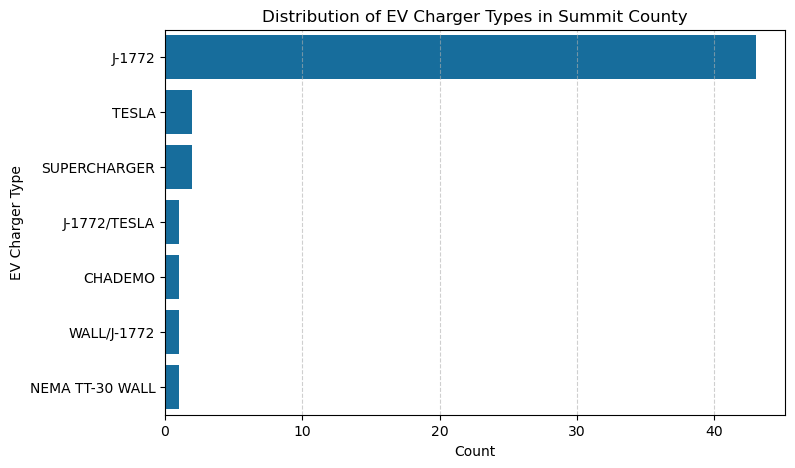

In [129]:
# Set colorblind-friendly style
sns.set_palette("colorblind")

plt.figure(figsize=(8, 5))
sns.countplot(data=ev_summit, y="Charger_Type", order=ev_summit["Charger_Type"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("EV Charger Type")
plt.title("Distribution of EV Charger Types in Summit County")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

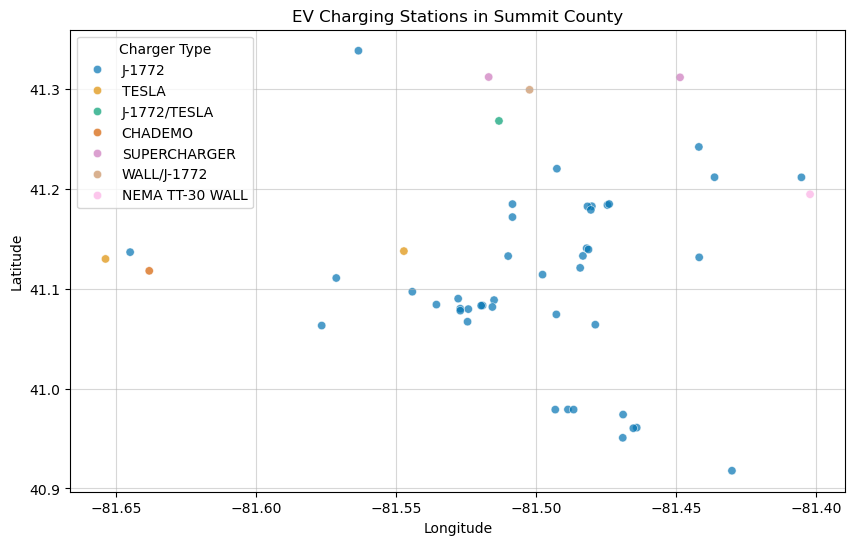

In [130]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ev_summit, x="Longitude", y="Latitude", hue="Charger_Type", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Charging Stations in Summit County")
plt.legend(title="Charger Type")
plt.grid(alpha=0.5)
plt.show()

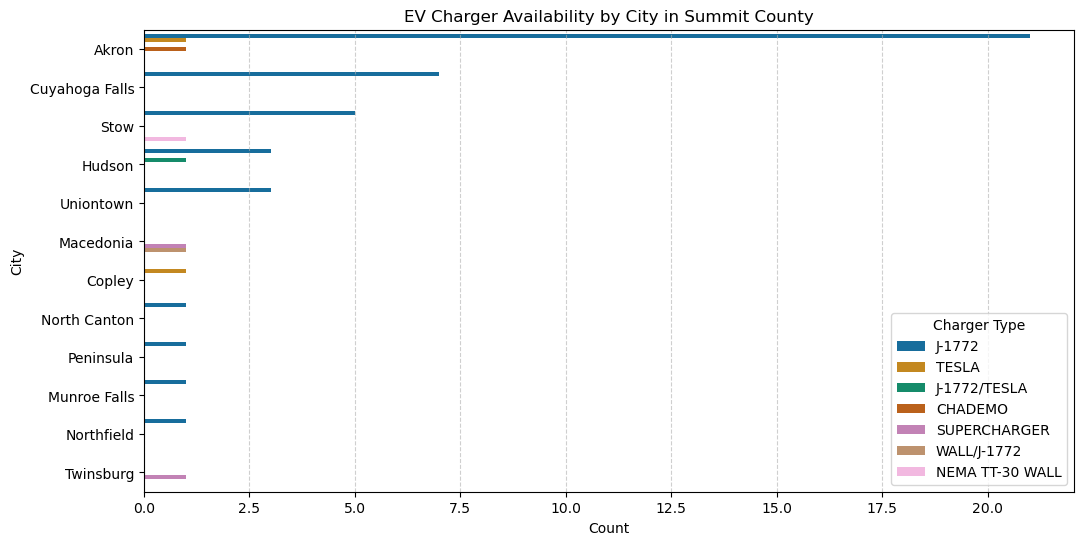

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ev_summit, y="City", hue="Charger_Type", order=ev_summit["City"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("City")
plt.title("EV Charger Availability by City in Summit County")
plt.legend(title="Charger Type")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

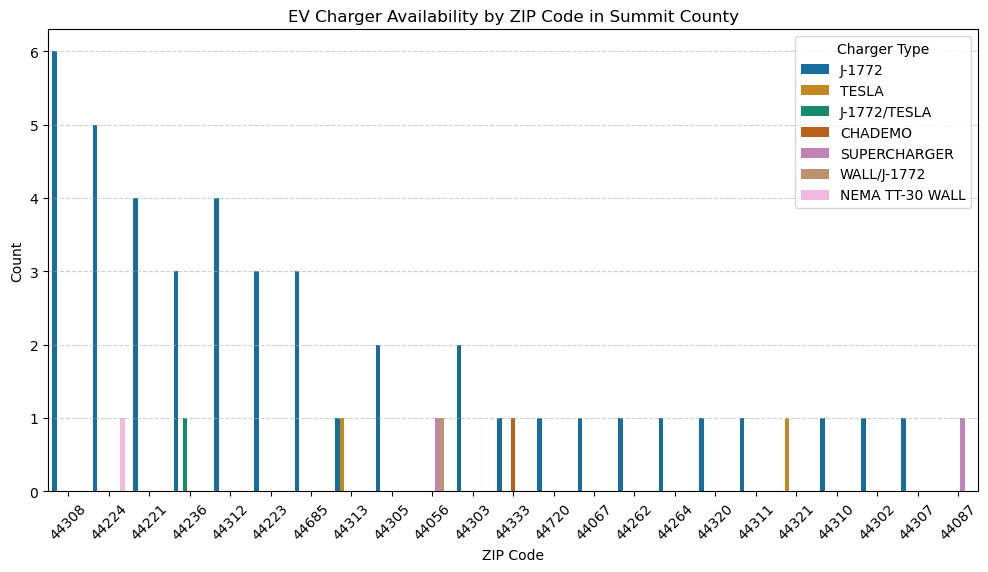

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ev_summit, x="Postal_Code", hue="Charger_Type", order=ev_summit["Postal_Code"].value_counts().index)
plt.xlabel("ZIP Code")
plt.ylabel("Count")
plt.title("EV Charger Availability by ZIP Code in Summit County")
plt.xticks(rotation=45)
plt.legend(title="Charger Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

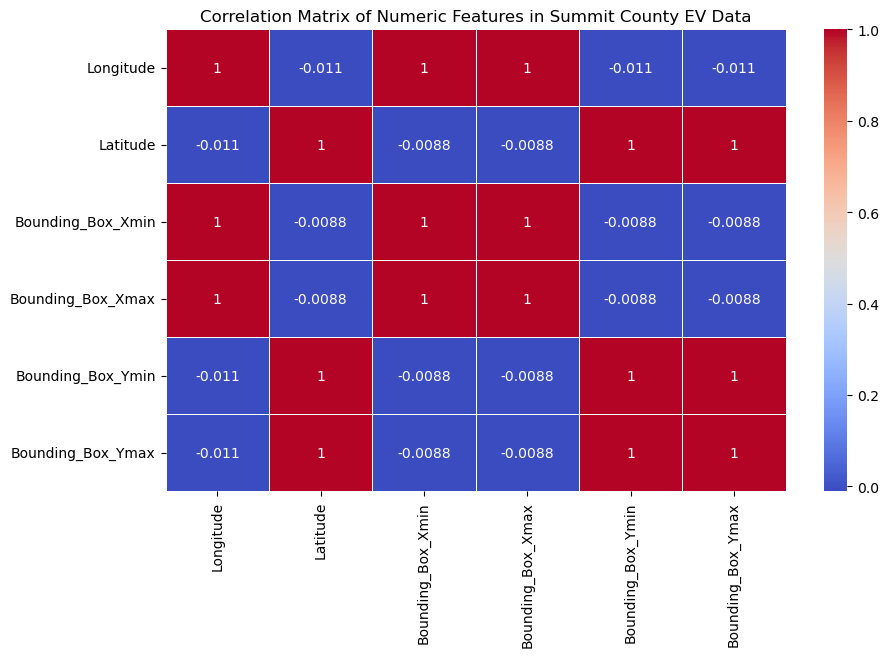

In [134]:
plt.figure(figsize=(10, 6))
sns.heatmap(ev_summit.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features in Summit County EV Data")
plt.show()